## Imported Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/creditcard.csv')

dataset.describe()
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


<ipython-input-8-2ce85cf396d7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=dataset, palette=colors)


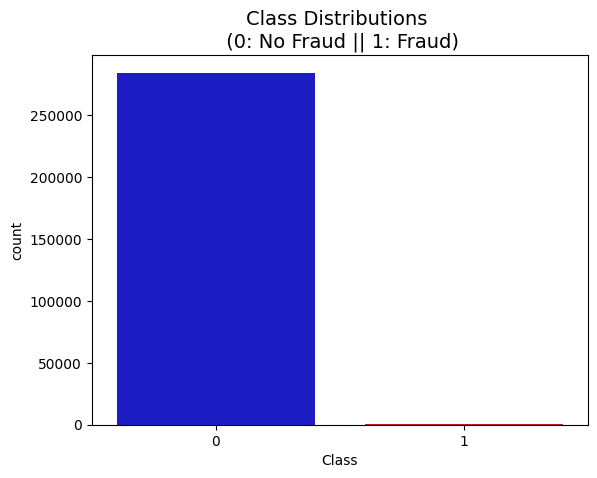

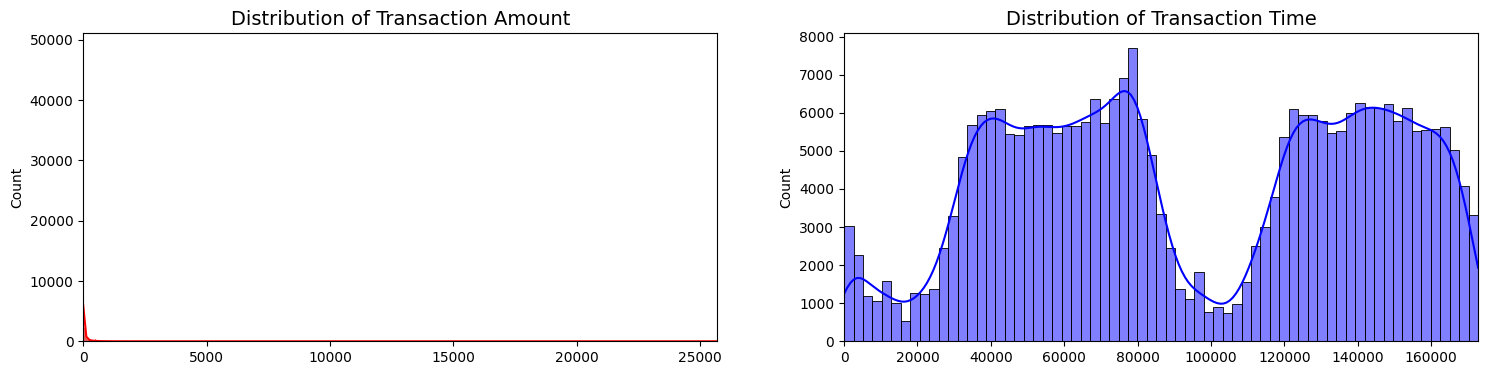

In [8]:
print('No Frauds', round(dataset['Class'].value_counts()[0]/len(dataset) * 100, 2), '% of the dataset')
print('Frauds', round(dataset['Class'].value_counts()[1]/len(dataset) * 100, 2), '% of the dataset')


# Plotting the class distribution
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=dataset, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

# Distributions: By seeing the distributions, we can get an idea of how skewed these features are
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Transaction Amount Distribution
amount_val = dataset['Amount'].values
sns.histplot(amount_val, ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Transaction Time Distribution
time_val = dataset['Time'].values
sns.histplot(time_val, ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

"Observe how imbalanced our dataset is—most transactions are non-fraudulent. If we use this dataset as-is for predictive modeling and analysis, we risk making significant errors, as our algorithms might overfit by 'assuming' that most transactions are not fraudulent. However, our goal isn't for the model to make assumptions; we want it to detect patterns that signal potential fraud"

In [9]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# RobustScaler is less prone to outliers.
#std_scaler = StandardScaler()
rob_scaler = RobustScaler()

dataset['scaled_amount'] = rob_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['scaled_time'] = rob_scaler.fit_transform(dataset['Time'].values.reshape(-1,1))

dataset.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = dataset['scaled_amount']
scaled_time = dataset['scaled_time']

dataset.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
dataset.insert(0, 'scaled_amount', scaled_amount)
dataset.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [10]:
print('No Frauds', round(dataset['Class'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Frauds', round(dataset['Class'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

X = dataset.drop('Class', axis=1)
y = dataset[['Class']]


#from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [265518 180305  42664 ...  29062  13766  17677] Test: [263020  11378 147283 ... 274532 269819  64170]
Train: [ 72227 114282  16818 ... 264471 191914 284017] Test: [202638  32978 128121 ... 244024 127667  48318]
Train: [ 20895 114622 167683 ... 244502 178972 218506] Test: [284352  82483  90981 ... 171224 168807 271602]
Train: [122248 181660 194400 ... 104631 277586  29432] Test: [225673  63348  68025 ... 279451  77554  76043]
Train: [241684 223467 136928 ...  86495 160550  49633] Test: [157557 204860  83760 ... 251478 178967 216850]


In [11]:
# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


## Given the significant class imbalance, we need to balance the classes to achieve a more even distribution.

## First, let's shuffle the data before creating the subsamples.

In [14]:
dataset = dataset.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = dataset.loc[dataset['Class'] == 1]
non_fraud_df = dataset.loc[dataset['Class'] == 0][:497]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()
new_df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,...,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,1.263176,0.032518,-2.352922,1.751137,-3.490497,2.240553,-1.591276,-0.698093,-2.759031,0.297819,...,0.206763,0.354144,0.031782,-0.031401,-0.050194,0.012672,0.007921,0.081825,0.030601,0.497472
std,4.287509,0.567652,5.525485,3.766982,6.215558,3.210687,4.201020,1.739119,5.847422,4.852376,...,1.141956,2.776676,1.159451,1.186052,0.549285,0.676679,0.485763,1.011656,0.435366,0.500247
min,-0.307413,-0.991036,-30.552380,-16.460999,-31.103685,-4.210100,-22.105532,-6.406267,-43.557242,-41.044261,...,-5.963919,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.248733,-7.263482,-2.687939,0.000000
25%,-0.290924,-0.463481,-2.880042,-0.213579,-5.111658,-0.061379,-1.820044,-1.549420,-3.059245,-0.171655,...,-0.200612,-0.152131,-0.521623,-0.247452,-0.387860,-0.322090,-0.302507,-0.062361,-0.061613,0.000000
50%,-0.042479,-0.063958,-0.698319,0.898474,-1.351177,1.350108,-0.425571,-0.639268,-0.666645,0.147698,...,0.027224,0.143177,0.052555,-0.037806,0.006686,0.045418,-0.069946,0.043519,0.032589,0.000000
75%,1.089779,0.592230,1.080602,2.829168,0.365003,4.225368,0.459853,0.081257,0.228792,0.876531,...,0.440439,0.632505,0.596265,0.189792,0.361106,0.386337,0.304883,0.443006,0.219021,1.000000
max,69.926081,1.027033,2.299322,22.057729,3.167154,12.114672,11.095089,6.474115,7.062382,20.007208,...,11.059004,27.202839,8.361985,5.466230,1.238106,2.208209,2.745261,3.052358,2.364396,1.000000


Distribution of the Classes in the subsample dataset
Class
0    0.502528
1    0.497472
Name: count, dtype: float64


<ipython-input-16-9dbec7d01431>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=new_df, palette=colors)


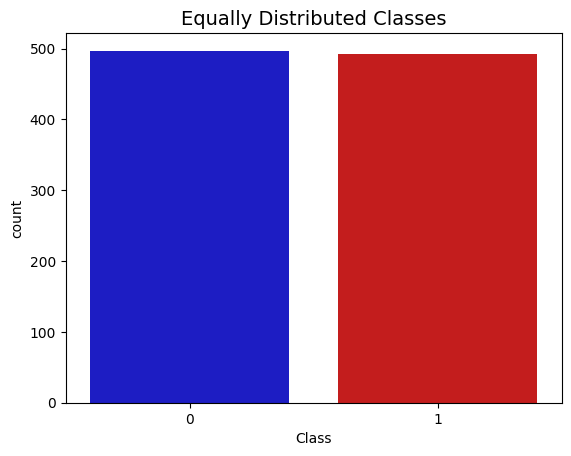

In [16]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts() / len(new_df))

# Plot the class distribution
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

T-SNE took 1e+01 s
PCA took 0.017 s
Truncated SVD took 0.022 s


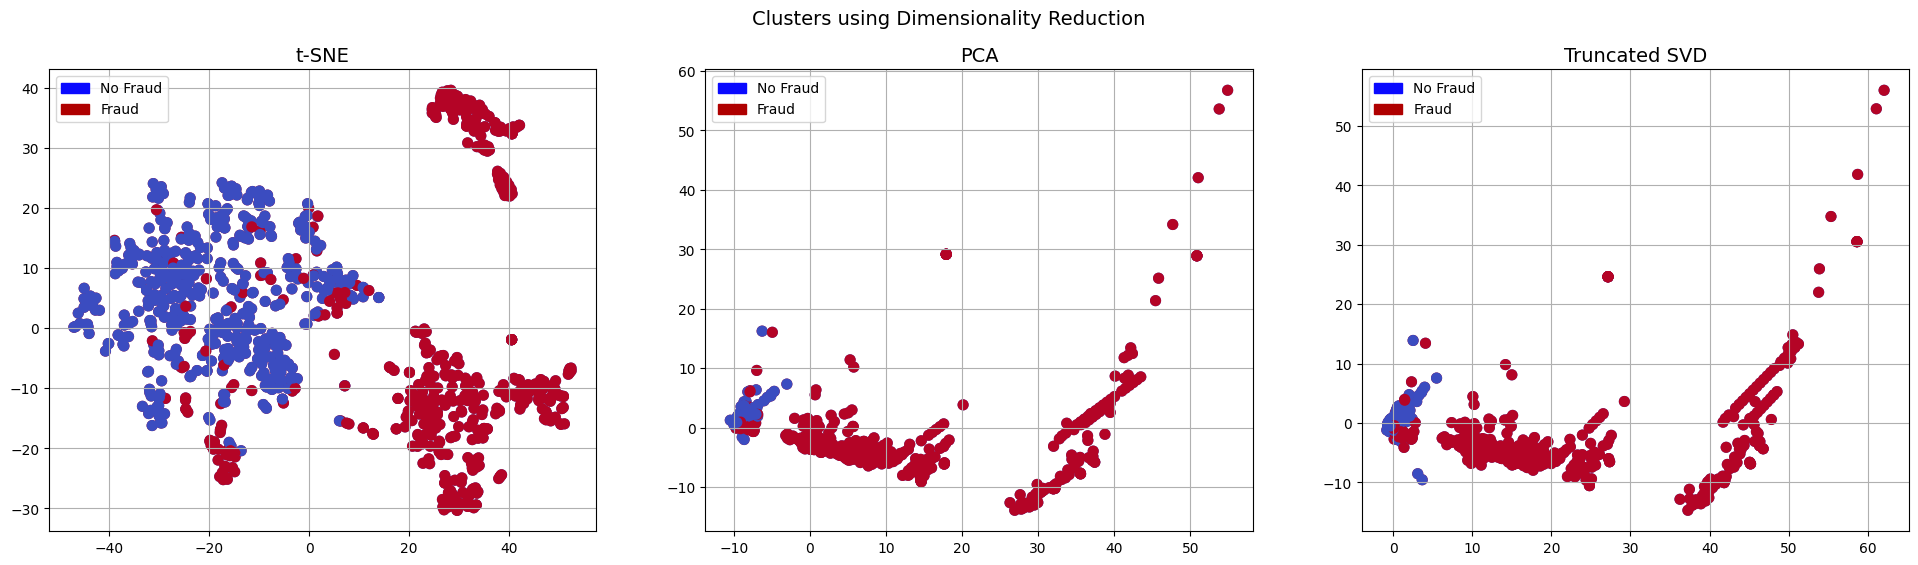

In [17]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plots
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

## Undersampling before cross validating (prone to overfit)

In [18]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [20]:
def plot_learning_curve(estimator1, X, y,name, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, (ax1) = plt.subplots(1,1, figsize=(10,7), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title(str(name)+" Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    return plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

Classifier: RandomForestClassifier
Confusion Matrix:
[[ 89   2]
 [  3 104]]


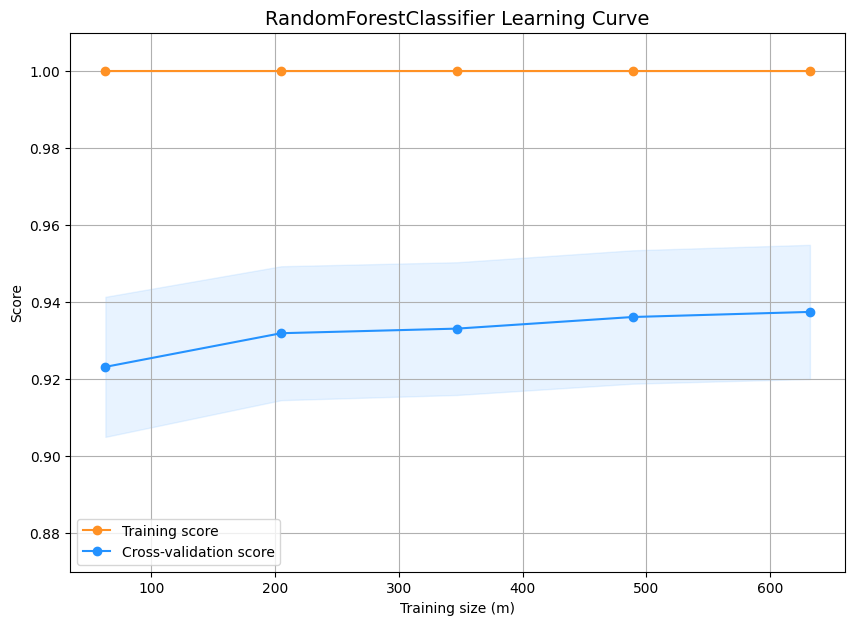

Accuracy Score: 0.9747474747474747
Precision Score: 0.9811320754716981
F1 Score: 0.9765258215962441
Confusion Matrix Ratios (tn, fp, fn, tp):
0.4494949494949495 0.010101010101010102 0.015151515151515152 0.5252525252525253
Specificity: 0.978021978021978
Sensitivity: 0.9719626168224299
Classifier: LogisticRegression
Confusion Matrix:
[[ 85   6]
 [  5 102]]


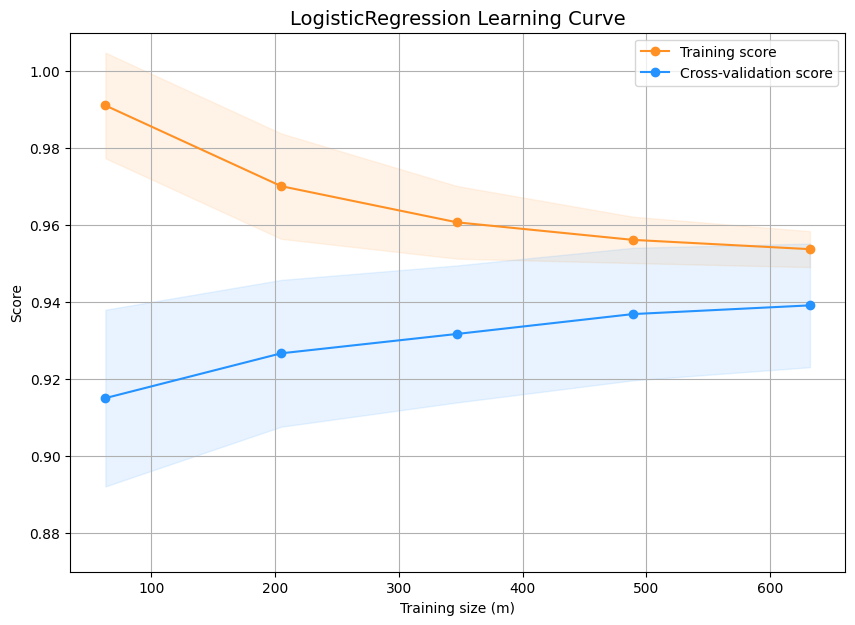

Accuracy Score: 0.9444444444444444
Precision Score: 0.9444444444444444
F1 Score: 0.9488372093023255
Confusion Matrix Ratios (tn, fp, fn, tp):
0.4292929292929293 0.030303030303030304 0.025252525252525252 0.5151515151515151
Specificity: 0.9340659340659341
Sensitivity: 0.9532710280373832
Classifier: KNeighborsClassifier
Confusion Matrix:
[[ 90   1]
 [  5 102]]


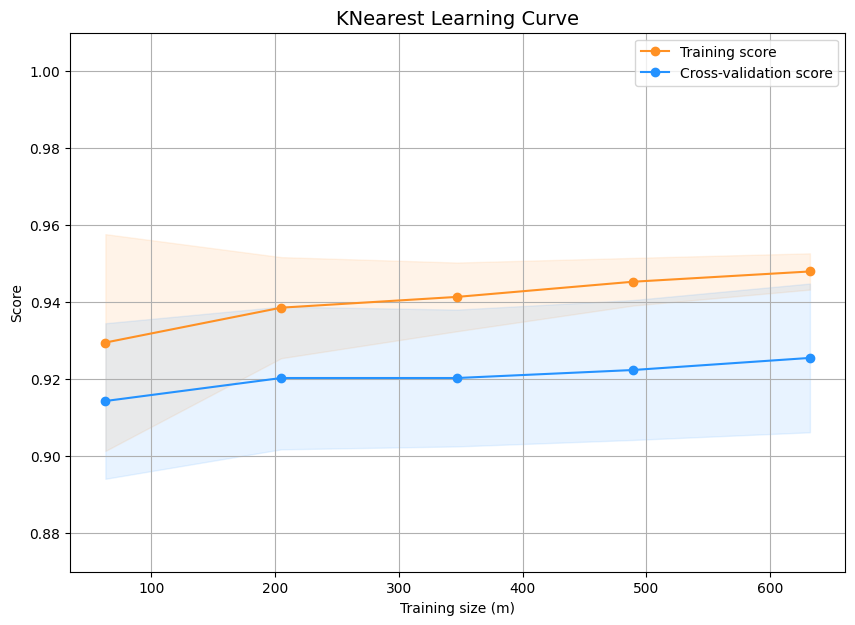

Accuracy Score: 0.9696969696969697
Precision Score: 0.9902912621359223
F1 Score: 0.9714285714285714
Confusion Matrix Ratios (tn, fp, fn, tp):
0.45454545454545453 0.005050505050505051 0.025252525252525252 0.5151515151515151
Specificity: 0.989010989010989
Sensitivity: 0.9532710280373832
Classifier: SVC
Confusion Matrix:
[[91  0]
 [ 8 99]]


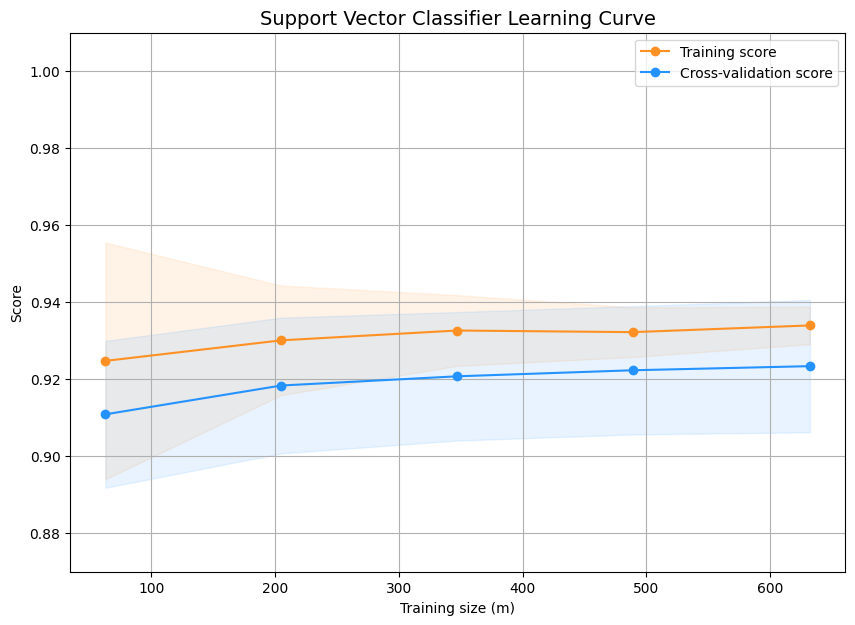

Accuracy Score: 0.9595959595959596
Precision Score: 1.0
F1 Score: 0.9611650485436893
Confusion Matrix Ratios (tn, fp, fn, tp):
0.4595959595959596 0.0 0.04040404040404041 0.5
Specificity: 1.0
Sensitivity: 0.9252336448598131
Classifier: DecisionTreeClassifier
Confusion Matrix:
[[ 86   5]
 [  7 100]]


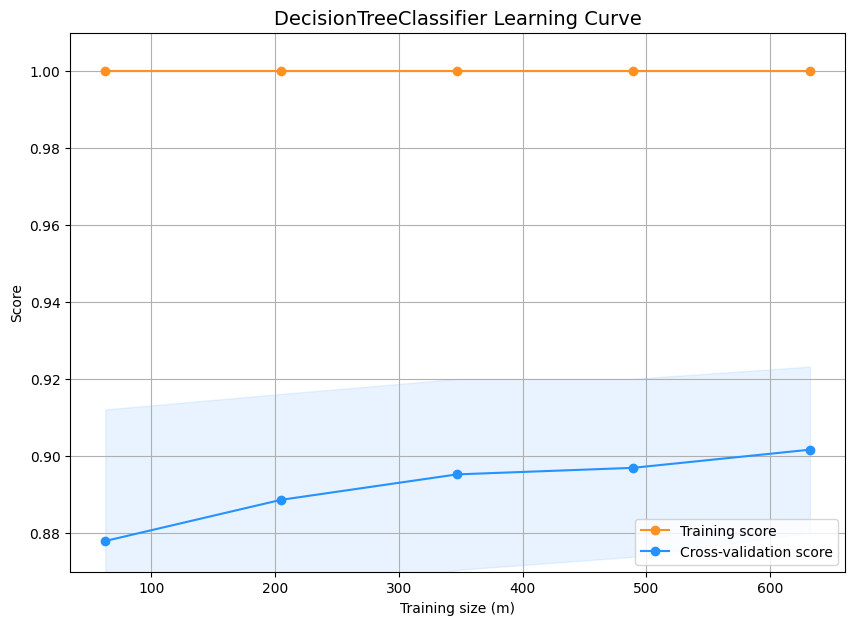

Accuracy Score: 0.9393939393939394
Precision Score: 0.9523809523809523
F1 Score: 0.9433962264150944
Confusion Matrix Ratios (tn, fp, fn, tp):
0.43434343434343436 0.025252525252525252 0.03535353535353535 0.5050505050505051
Specificity: 0.945054945054945
Sensitivity: 0.9345794392523364


In [22]:
# Necessary Imports
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier  # Uncomment if you want to use XGBoost
#import collections

# Define classifiers
classifiers = {
    "RandomForestClassifier": RandomForestClassifier(n_estimators=300),
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    # "XGBClassifier": XGBClassifier()  # Uncomment if using XGBoost
}

for key, classifier in classifiers.items():
    # Fit the model
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Classifier: {classifier.__class__.__name__}")
    print("Confusion Matrix:")
    print(cm)

    # Cross-validation score
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)

    # Learning curve
    cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
    x = plot_learning_curve(classifier, X_train, y_train, key, (0.87, 1.01), cv=cv, n_jobs=4)
    plt.show()  # Ensure plot is shown

    # Evaluation metrics
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    pr = precision_score(y_test, y_pred)

    # Confusion matrix values: tn, fp, fn, tp
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    total = tn + fp + fn + tp

    print(f"Accuracy Score: {acc}")
    print(f"Precision Score: {pr}")
    print(f"F1 Score: {f1}")

    # Specificity and Sensitivity
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    print("Confusion Matrix Ratios (tn, fp, fn, tp):")
    print(tn/total, fp/total, fn/total, tp/total)
    print(f"Specificity: {specificity}")
    print(f"Sensitivity: {sensitivity}")
    print("="*50)  # Separator for readability

In [24]:
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [25]:
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [29]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [30]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [28]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [31]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [32]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [33]:
legit_sample = legit.sample(n=492)

In [34]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [35]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169261,119602.0,-0.802918,0.058031,1.472933,0.261638,-0.365862,0.602420,-0.892123,0.659528,-1.252330,...,-0.102762,0.027065,0.036171,0.382628,-0.500318,-0.588846,0.158900,0.065731,26.12,0
32589,36866.0,0.909944,-0.870050,1.076600,0.228204,-1.267034,0.300173,-0.776610,0.371579,1.106529,...,-0.092892,-0.306166,0.046458,0.281851,-0.074307,0.934952,-0.048606,0.018234,112.16,0
267854,162957.0,1.915642,-0.062979,-2.435972,0.785763,1.679736,1.169529,0.382019,0.138880,-0.135232,...,0.106474,0.180422,0.062662,3.070950,0.516034,-0.655455,-0.052256,-0.030803,75.00,0
250810,155076.0,-0.529056,1.109320,-0.394555,-0.811712,0.164030,-0.622613,0.443720,0.497642,-0.001465,...,-0.248200,-0.713607,0.087962,-0.549298,-0.434989,0.163151,0.215866,0.074465,9.32,0
122140,76450.0,-1.418667,2.135521,-0.352247,0.844190,-0.049886,-0.160860,-0.708251,-2.068268,-0.881434,...,-1.249207,0.441120,0.103056,-0.161446,-0.225501,-0.351892,0.368700,0.258952,12.95,0


In [36]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [37]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95130.530488,-0.043711,-0.071554,0.040962,0.039916,0.012707,-0.004063,0.057996,-0.054469,-0.026131,...,-0.009301,-0.017950,-0.020115,-0.048720,0.019207,0.035084,0.062022,0.006338,-0.019367,89.033862
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [38]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [39]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
169261  119602.0 -0.802918  0.058031  1.472933  0.261638 -0.365862  0.602420   
32589    36866.0  0.909944 -0.870050  1.076600  0.228204 -1.267034  0.300173   
267854  162957.0  1.915642 -0.062979 -2.435972  0.785763  1.679736  1.169529   
250810  155076.0 -0.529056  1.109320 -0.394555 -0.811712  0.164030 -0.622613   
122140   76450.0 -1.418667  2.135521 -0.352247  0.844190 -0.049886 -0.160860   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [40]:
print(Y)

169261    0
32589     0
267854    0
250810    0
122140    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [43]:
model = LogisticRegression()

In [44]:
model.fit(X_train, Y_train)

LogisticRegression()

In [45]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [47]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9428208386277002


In [48]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [49]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9238578680203046
